In [1]:
%matplotlib inline
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 400

### Подбор параметров МНК и МНМ для линейной регрессии
Найти оценки коэффициентов линейной регрессии $ 𝑦_i = 𝑎 + 𝑏𝑥_i + 𝑒 $
,
используя 20 точек на отрезке [-1.8; 2] с равномерным шагом равным
0.2. Ошибку $𝑒_{i}$ считать нормально распределённой с параметрами (0,
1). В качестве эталонной зависимости взять $ 𝑦_i = 2 + 2𝑥 + 𝑒_i $
. При построении оценок коэффициентов использовать два критерия: критерий наименьших квадратов и критерий наименьших модулей. Проделать то же самое для выборки, у которой в значения $𝑦_1$ и $𝑦_{20}$ вносятся
возмущения 10 и -10.

In [2]:
def rq(x,y):
    n1 = 0
    n2 = 0
    n3 = 0
    n4 = 0
    
    x_med = np.median(x)
    y_med = np.median(y)
 
    for i in range(len(x)):
        if (x[i] >= x_med) and (y[i] >= y_med):
            n1 += 1
        if (x[i] < x_med) and (y[i] >= y_med):
            n2 += 1
        if (x[i] < x_med) and (y[i] < y_med):
            n3 += 1
        if (x[i] >= x_med) and (y[i] < y_med):
            n4 += 1
    return ((n1 + n3) - (n2 + n4))/len(x)

Класс который реализует подбор параметров линейной регрессии МНК и МНМ

In [3]:
class Linear():
    def __init__(self):
        self.B0 = 0
        self.B1 = 0
    
    def train(self,x,y,method):
        
        # Подбор параметром методом МНК (метод наименьшних квадратов) y = B0 + B1*x
        if method == "MNK":
            self.B1 = ((x * y).mean() - x.mean() * y.mean())/((x * x).mean() - (x.mean())**2)
            self.B0 = y.mean() - x.mean()*self.B1
            
        
        #Подбор параметров методом МНМ
        if method == "MNM":
            self.B1 = rq(x,y) * ((np.quantile(y,3/4) - np.quantile(y,1/4))/(len(y) * 0.5) / ((np.quantile(x,3/4) - np.quantile(x,1/4))/(len(x)*0.5))) 
            self.B0 = np.median(y) - self.B1*np.median(x)
            
    def predict(self,x):
        return self.B0 + self.B1 * x  

Критерий оптимальности по $l^2$ норме

In [4]:
def distance(y1,y2):
    return sum([abs(y1[i] - y2[i]) ** 2 for i in range(len(y1))])

Без возмущений

MNK
B0 :2.3525332727729014
B1 :1.604929200142259
MNM
B0 :2.245614251129639
B1 :0.8538307992578928


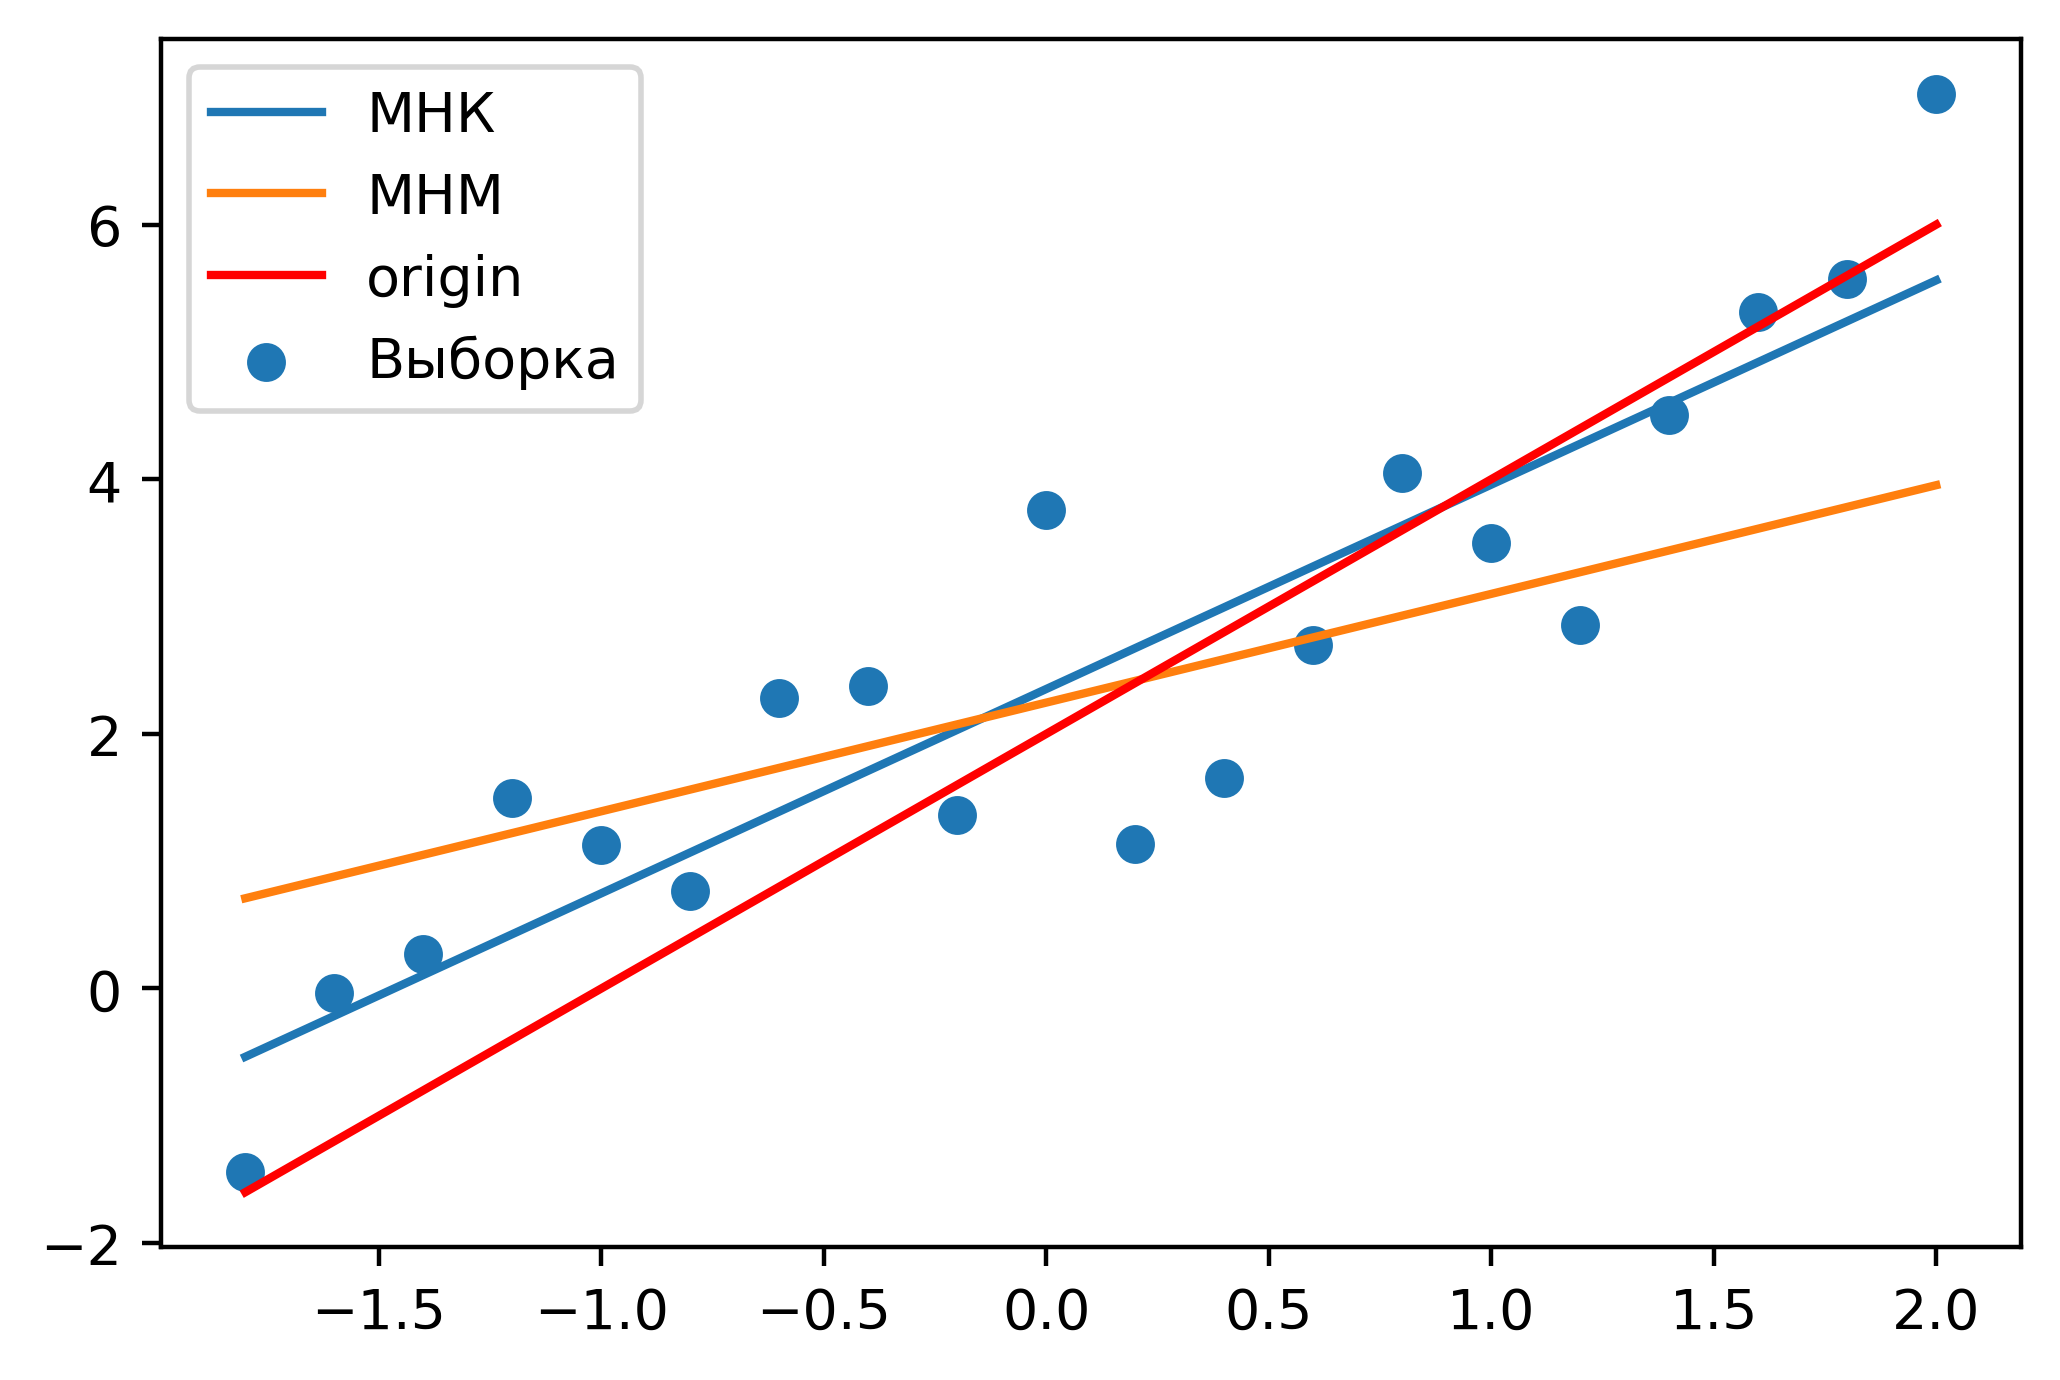

distance MNK 57.538080688291295
distance MNM 322.7743184299721


In [7]:
# границы 
a = -1.8 
b = 2

# количество точек для обучения
n = 20

# нормально распределенная ошибка
e = st.norm.rvs(size=n)

x_train = np.linspace(a,b,n)
x_predict = np.linspace(a,b,200)

# истиная функция с оштбкой
y_train = 2 + 2 * x_train + e
plt.scatter(x= x_train,y= y_train,label="Выборка")


#MNK
Lin = Linear()
Lin.train(x_train,y_train,method="MNK")
y_predict_MNK = Lin.predict(x_predict)
plt.plot(x_predict,y_predict_MNK,label="МНК")

print("MNK")
print("B0 :" + str(Lin.B0))
print("B1 :" + str(Lin.B1))

#MNM
Lin.train(x_train,y_train,method="MNM")
y_predict_MNM = Lin.predict(x_predict)
plt.plot(x_predict ,y_predict_MNM,label="МНМ")

print("MNM")
print("B0 :" + str(Lin.B0))
print("B1 :" + str(Lin.B1))


#original
y_origin = 2 + 2*x_predict
plt.plot(x_predict, y_origin,c="r", label = "origin")
plt.legend()
plt.show()

# opt of method
print("distance MNK " + str(distance(y_predict_MNK,y_origin)))
print("distance MNM " +  str(distance(y_predict_MNM,y_origin)))

С возмущениями

MNK
B0 :1.7628390069358828
B1 :0.6667207200792042
MNM
B0 :1.6995741519092726
B1 :1.0393946136066972


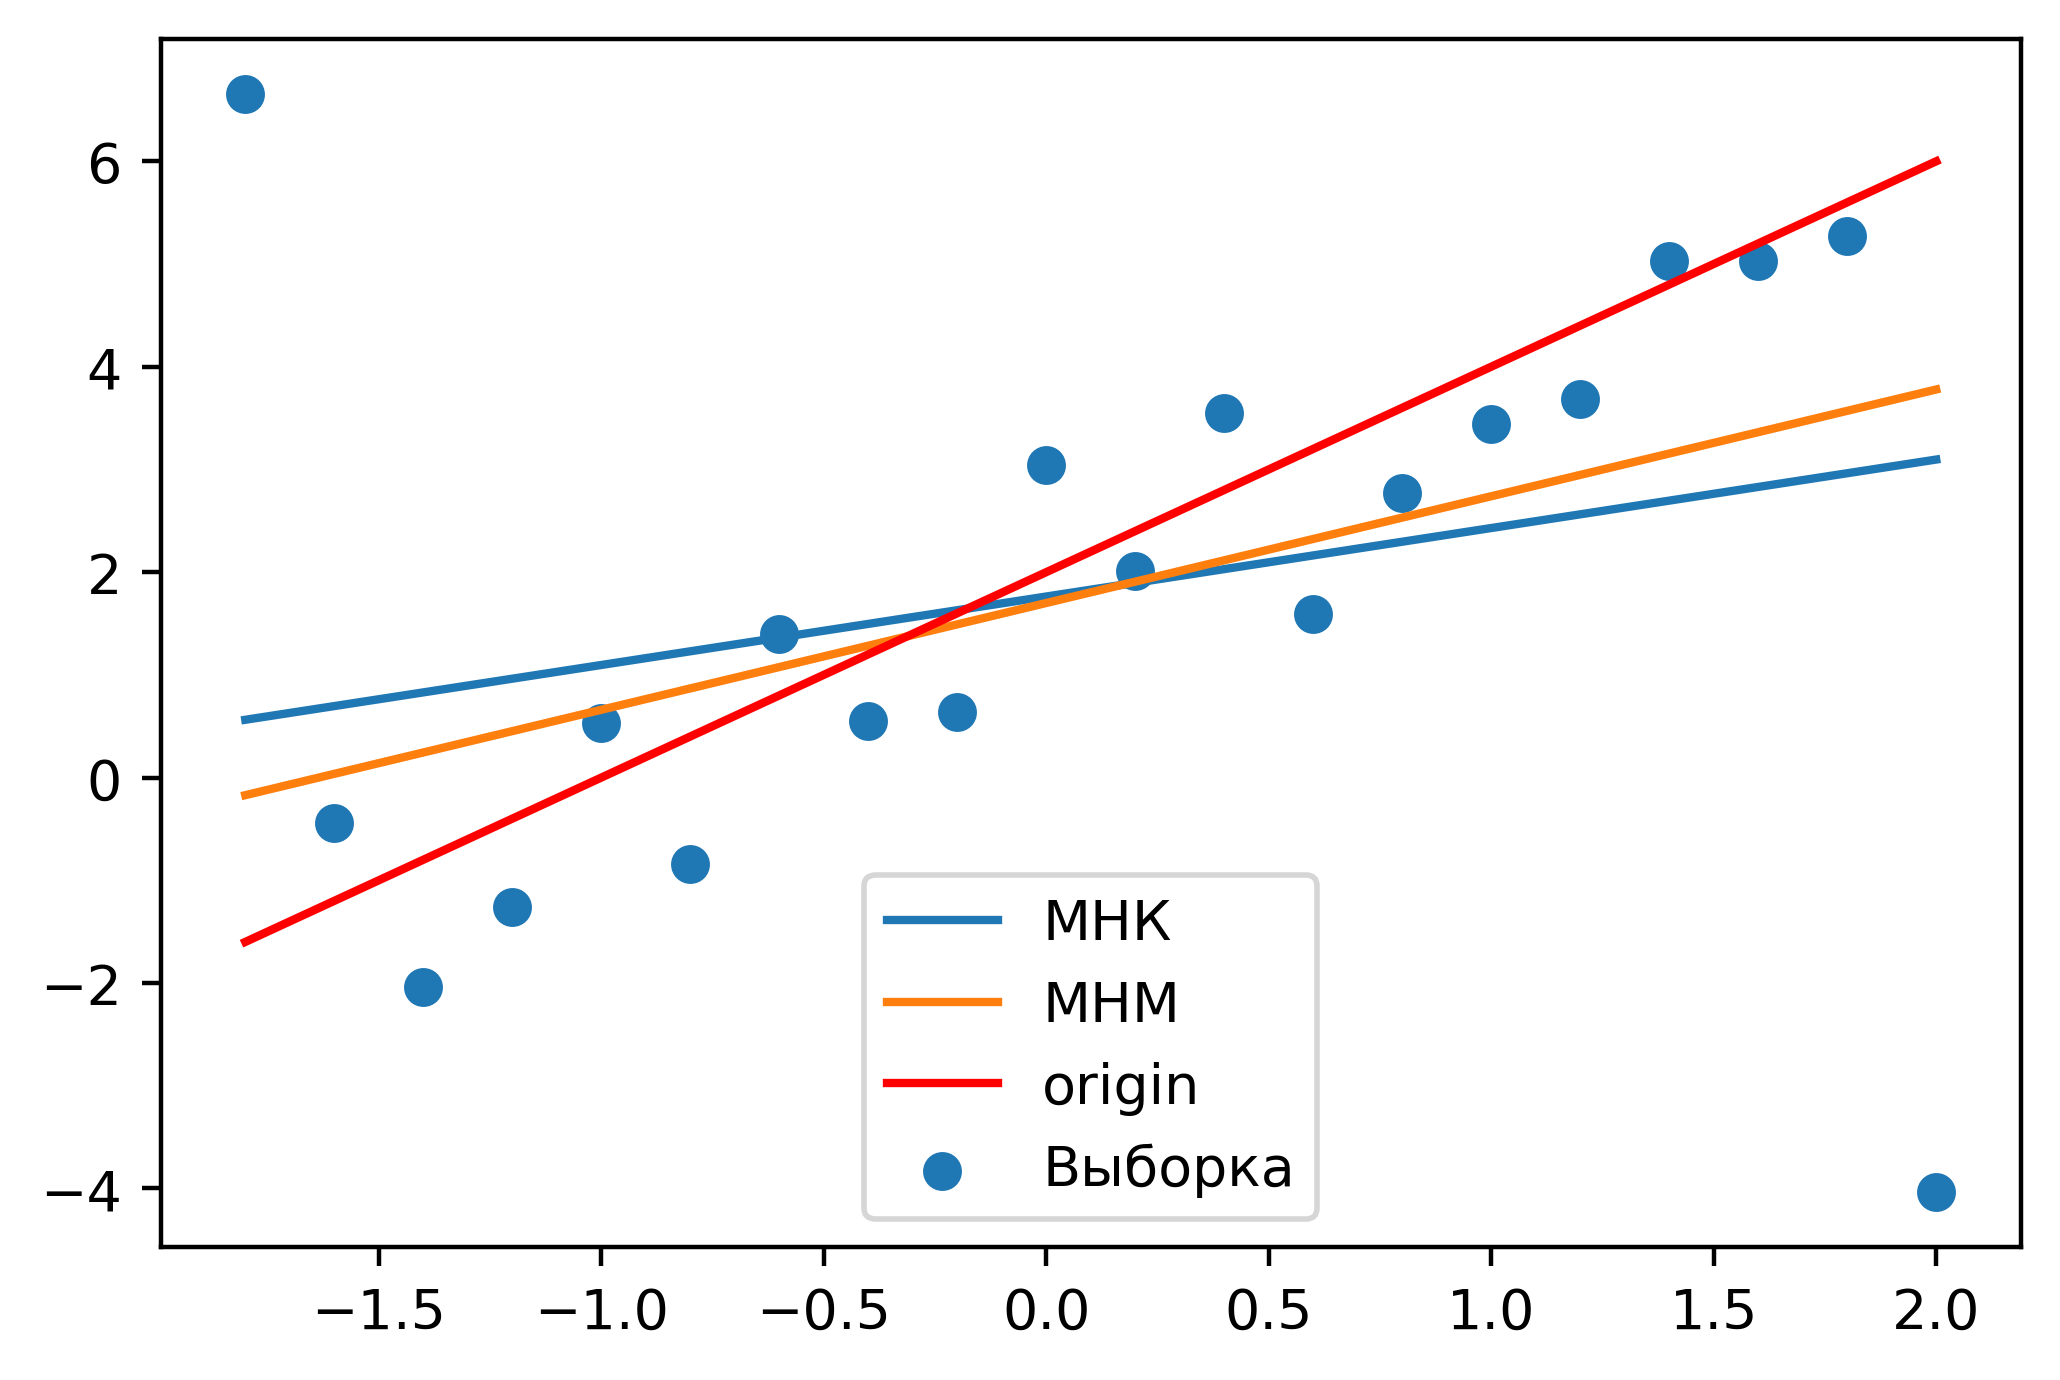

distance MNK 459.56924037374546
distance MNM 255.75045808091986


In [8]:
# границы 
a = -1.8 
b = 2

# количество точек для обучения
n = 20

# нормально распределенная ошибка
e = st.norm.rvs(size=n)

x_train = np.linspace(a,b,n)
x_predict = np.linspace(a,b,200)

# истиная функция
y_train = 2 + 2 * x_train + e

# добавление помех
y_train[0] += 10
y_train[-1]  -= 10


plt.scatter(x= x_train,y= y_train,label="Выборка")


#MNK
Lin = Linear()
Lin.train(x_train,y_train,method="MNK")
y_predict_MNK = Lin.predict(x_predict)
plt.plot(x_predict,y_predict_MNK,label="МНК")

print("MNK")
print("B0 :" + str(Lin.B0))
print("B1 :" + str(Lin.B1))

#MNM
Lin.train(x_train,y_train,method="MNM")
y_predict_MNM = Lin.predict(x_predict)
plt.plot(x_predict ,y_predict_MNM,label="МНМ")

print("MNM")
print("B0 :" + str(Lin.B0))
print("B1 :" + str(Lin.B1))


#original
y_origin = 2 + 2*x_predict
plt.plot(x_predict, y_origin,c="r", label = "origin")
plt.legend()
plt.show()

# opt of method
print("distance MNK " + str(distance(y_predict_MNK,y_origin)))
print("distance MNM " +  str(distance(y_predict_MNM,y_origin)))